In [29]:
import pandas as pd
import numpy as mp

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import collections
from PIL import Image
#following imports are needed for ploting the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns
#Installing graphviz is a very hectic thing, go through some youtube tutorial for successfully installing graphvig and pydotplus
import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [30]:
data = pd.read_csv('Employee.csv')

In [31]:
data.head()

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,Yes,1102,1,2,1,1,2,94,3,2,...,3,1,80,0,8,0,1,6,4,0
1,No,279,8,1,1,2,3,61,2,2,...,4,4,80,1,10,3,3,10,7,1
2,Yes,1373,2,2,1,4,4,92,2,1,...,3,2,80,0,7,3,3,0,0,0
3,No,1392,3,4,1,5,4,56,3,1,...,3,3,80,0,8,3,3,8,7,3
4,No,591,2,1,1,7,1,40,3,1,...,3,4,80,1,6,3,3,2,2,2


In [32]:
features = data.columns
features

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [33]:
features = [x for x in features if x != 'Attrition'] #This will take all the x or the inputs to the features without "Attrition"
                                                    #because "Attrition is Y or output"
features

['DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

In [34]:
train, test = train_test_split(data, test_size = 0.07)
print(len(data))
print(len(train))
print(len(test))

1470
1367
103


In [35]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [36]:
x_train = train[features]
y_train = train["Attrition"]

x_test = test[features]
y_test = test["Attrition"]

In [37]:
dt = dt.fit(x_train, y_train)

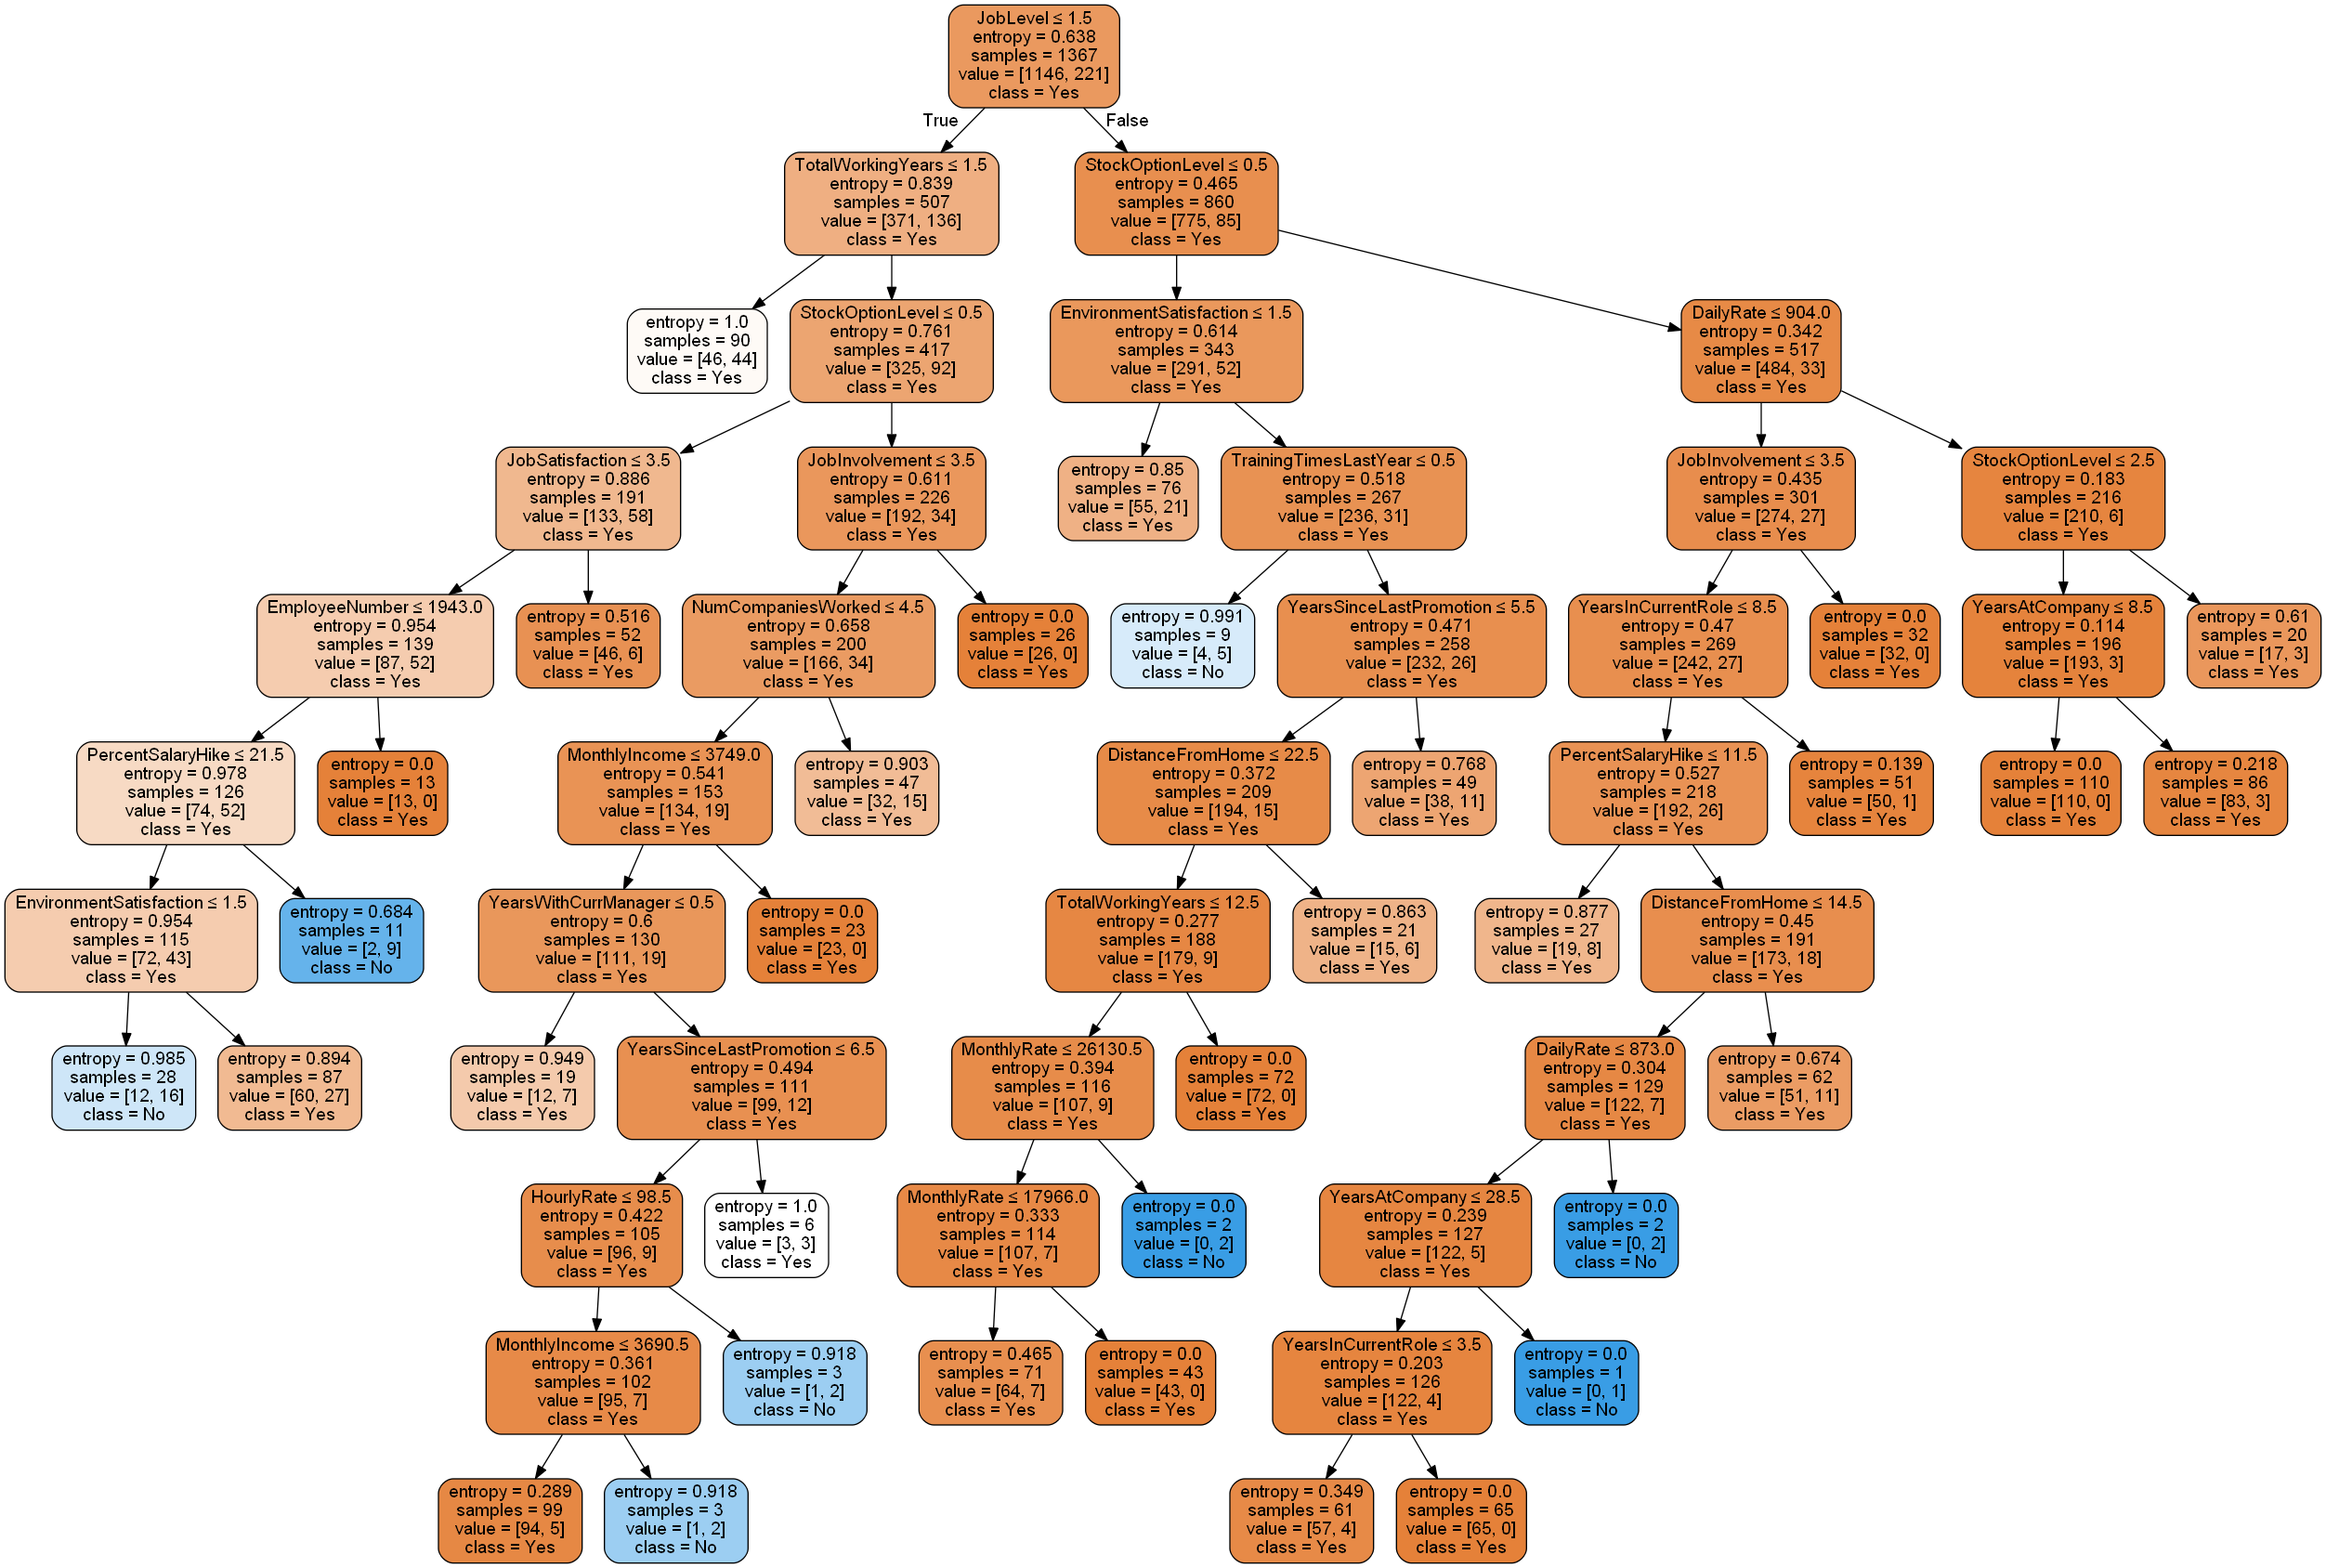

In [38]:
#If you cant not install the graphvig properly then the following code will not run... Just comment out this block and the other
#code part should work just fine.
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=data.Attrition,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
y_pred = dt.predict(x_test)

In [40]:
y_pred #These are the predicted values. 

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No'], dtype=object)

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  80.6 %
